# Praktikis Biletebi

In [1]:
from matplotlib.font_manager import fontManager, FontProperties
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [275]:
df = pd.read_csv("./results.csv", encoding='utf-8', na_values=['undefined'], keep_default_na=True)

In [276]:
path = r"./arial_geo.ttf"
fontManager.addfont(path)
prop = FontProperties(fname=path)
palette_color = sns.color_palette('pastel') 
sns.set_theme(style="whitegrid", font=prop.get_name())

In [277]:
df["id"].duplicated().value_counts()

id
False    921
Name: count, dtype: int64

<Axes: title={'center': 'Correct Answer Statistics'}, ylabel='count'>

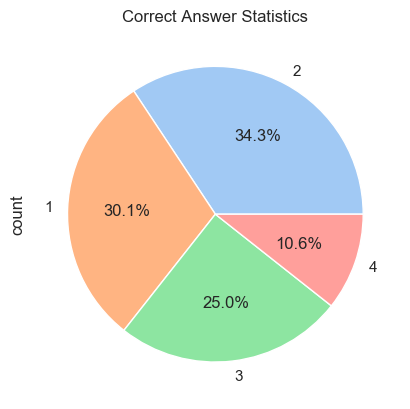

In [278]:
df["correctAnswerIndex"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=palette_color, title="Correct Answer Statistics")

In [279]:
# fix, ax = plt.subplots()
df["imageURL"].value_counts()
# print(imageOrNa)
# ax.pie(imageOrNa, labels=["With Image", "Without Image"], autopct="%1.1f%%", colors=palette_color)

imageURL
https://starti.ge/exam/ticket_media/new/ticketIMG-1.jpg       1
https://starti.ge/exam/ticket_media/new/ticketIMG-712.jpg     1
https://starti.ge/exam/ticket_media/new/ticketIMG-708.jpg     1
https://starti.ge/exam/ticket_media/new/ticketIMG-706.jpg     1
https://starti.ge/exam/ticket_media/new/ticketIMG-698.jpg     1
                                                             ..
https://starti.ge/exam/ticket_media/new/ticketIMG-317.jpg     1
https://starti.ge/exam/ticket_media/new/ticketIMG-314.jpg     1
https://starti.ge/exam/ticket_media/new/ticketIMG-313.jpg     1
https://starti.ge/exam/ticket_media/new/ticketIMG-312.jpg     1
https://starti.ge/exam/ticket_media/new/ticketIMG-1811.jpg    1
Name: count, Length: 524, dtype: int64

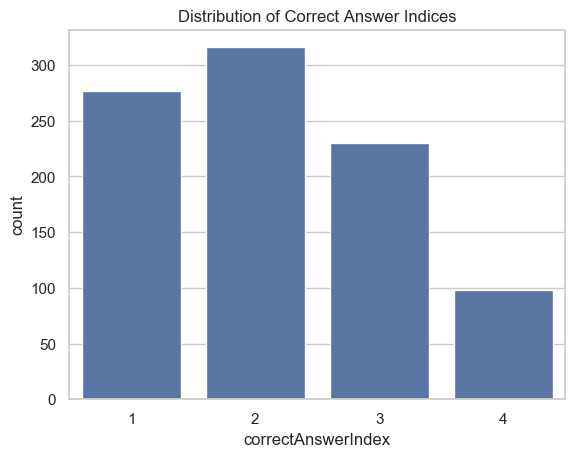

In [280]:
sns.countplot(x='correctAnswerIndex', data=df)
plt.title('Distribution of Correct Answer Indices')
plt.show()

In [281]:
def is_correct_answer_unique_starting_letter(row):
    # Extract all non-None answers
    answers = [row[f'answers.{i}'] for i in range(4) if pd.notna(row[f'answers.{i}'])]

    if len(answers) <= 2:
        return None
    
    # Get the starting letters of all answers
    starting_letters = [answer[0] for answer in answers]
    
    # Count the frequency of each starting letter
    from collections import Counter
    letter_counts = Counter(starting_letters)
    
    # Check if all answers except one start with the same letter
    if len(letter_counts) == 2 and 1 in letter_counts.values():
        # Find the unique starting letter
        unique_letter = [letter for letter, count in letter_counts.items() if count == 1][0]
        
        # Find the index of the answer with the unique starting letter
        unique_index = starting_letters.index(unique_letter)
        
        # Check if this unique answer is the correct answer
        correct_answer_index = row['correctAnswerIndex']
        return unique_index == correct_answer_index
    return None

Total rows where the condition is met: 59
Percentage of rows where the condition is met: 24.08%


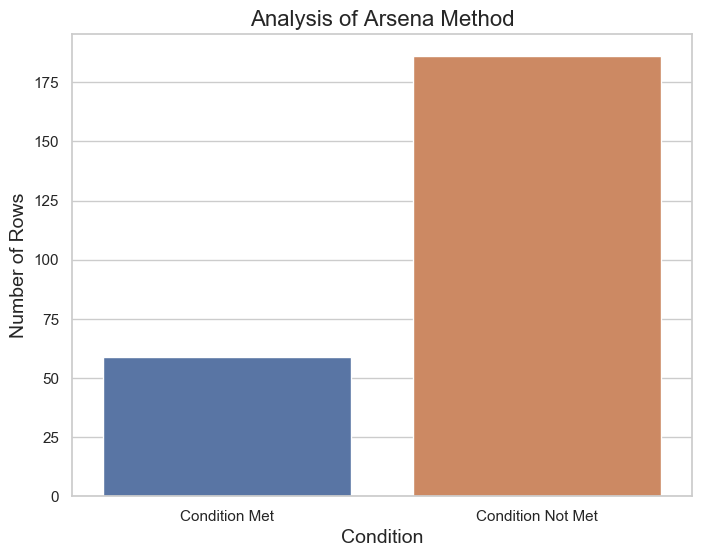

In [282]:
# Apply the function to each row
cond = df.apply(is_correct_answer_unique_starting_letter, axis=1)
if cond is not None:
    df['is_unique_starting_letter_correct'] = cond

# Calculate the total number of rows where the condition is met
falsy, truthy = df['is_unique_starting_letter_correct'].value_counts()
# Calculate the percentage of rows where the condition is met
percentage_condition_met = (truthy / (truthy + falsy)) * 100

print(f"Total rows where the condition is met: {truthy}")
print(f"Percentage of rows where the condition is met: {percentage_condition_met:.2f}%")

summary_data = {
    'Condition': ['Condition Met', 'Condition Not Met'],
    'Count': [truthy, falsy]
}
summary_df = pd.DataFrame(summary_data)

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Condition', y='Count', data=summary_df, hue="Condition", legend=False)

# Add title and labels
plt.title('Analysis of Arsena Method', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Number of Rows', fontsize=14)

# Show the plot
plt.show()

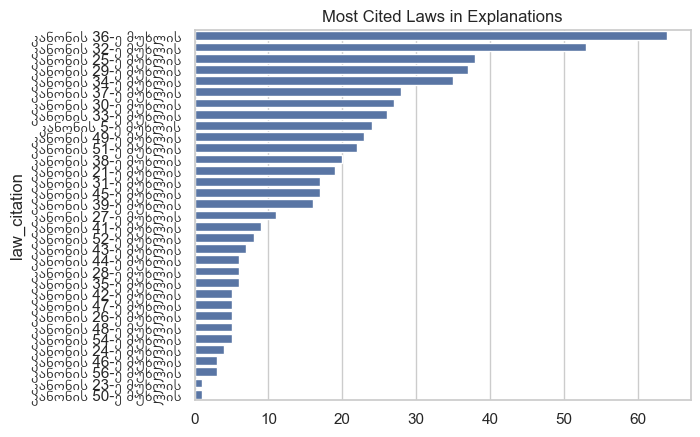

In [283]:
# Extract laws from explanations (e.g., "კანონის 25-ე მუხლის")
df['law_citation'] = df['explanation'].str.extract(r'(კანონის \d+-ე მუხლის)')
law_counts = df['law_citation'].value_counts()

sns.barplot(x=law_counts.values, y=law_counts.index)
plt.title('Most Cited Laws in Explanations')
plt.show()

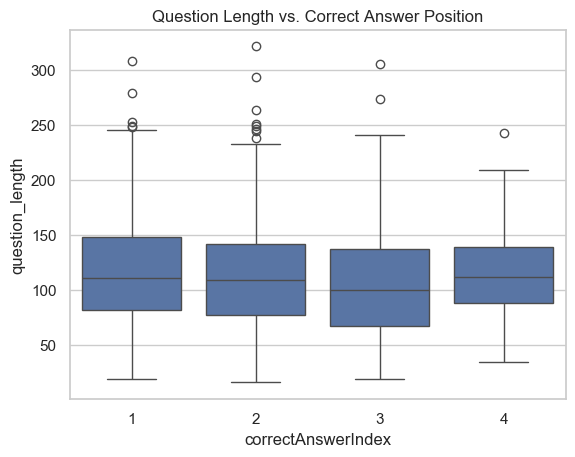

In [284]:
df['question_length'] = df['question'].apply(len)
sns.boxplot(x='correctAnswerIndex', y='question_length', data=df)
plt.title('Question Length vs. Correct Answer Position')
plt.show()